# A tutorial introduction into deep learning with Keras and Tensorflow.  We will use the MNIST dataset which is the 'Hello world' problem of deep learning

I always like to start my jupyter notebooks with this code because it fits the display window to my screen.

In [177]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/00/b8xr0x6s43g17063175rmbt80000gn/T/ipykernel_91035/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### This tutorial was adapted from Deep Learning with Python Chollet, F. (2021). Deep Learning with Python (2nd ed.). Greenwich, CT, USA: Manning Publications Co.

Start with some definitions.
Numerical data in an array are called [tensors](https://en.wikipedia.org/wiki/Tensor).

Scalars are 0-dimensional tensors (a single digit).

In [178]:
import numpy as np
x = np.array(12)
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 0 dimensions

The value of x is 12
The dimension of this tensor is 0


A 1-dimensional tensor is also called a vector

In [179]:
x = np.array([12, 1, 2, 3]) #create a vector
print('The value of x is', x)
print('The dimention of this tensor is', x.ndim) # 1 dimensions

The value of x is [12  1  2  3]
The dimention of this tensor is 1


A 2-dimensional tensor is also called a matrix

In [180]:
x = np.array([[12, 1, 2, 3],
              [5, 6, 7, 8,],
              [10, 11, 12, 12]])
print('The value of x is', x) # Print the 3 x 4 matrix
print('The dimension of this tensor is', x.ndim) # 2 dimensions

The value of x is [[12  1  2  3]
 [ 5  6  7  8]
 [10 11 12 12]]
The dimension of this tensor is 2


We can create n-dimensional tensors easily, although they become difficult to visualize.
This 3D tensor is like a cube of data.
![image.png](attachment:image.png)

In [181]:
x = np.array([[[12, 1, 2, 3],
               [5, 6, 7, 8,],
               [10, 11, 12, 12]],
              [[2, 2, 2, 2,],
               [3,3,3,3],
               [4,4,4,4]],
              [[5,5,5,5],
               [6,6,6,6],
               [7,7,7,7]]])
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 3 dimensional array

The value of x is [[[12  1  2  3]
  [ 5  6  7  8]
  [10 11 12 12]]

 [[ 2  2  2  2]
  [ 3  3  3  3]
  [ 4  4  4  4]]

 [[ 5  5  5  5]
  [ 6  6  6  6]
  [ 7  7  7  7]]]
The dimension of this tensor is 3


#### Reshaping tensors is an important concept to understand.  We can reshape a tensor as long as it has the same number of elements as the initial tensor.

In [182]:
x = x.reshape(3*3*4,1)
print(x)
x = x.reshape(4, 3*3)
print(x)
x = x.reshape(2, 18)
print(x)

[[12]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [11]
 [12]
 [12]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]]
[[12  1  2  3  5  6  7  8 10]
 [11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5]
 [ 5  6  6  6  6  7  7  7  7]]
[[12  1  2  3  5  6  7  8 10 11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7]]


##### Tensors have three attributes:
- Number of axes (dimensions)
- Shape (length of each axis)
- Data type (typically we will use `float32`)

We can also manipulate tensors with TensorFlow

In [183]:
import tensorflow as tf
for device in tf.config.list_physical_devices():
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [184]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [185]:
# Create a Tensorflow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3274686],
       [-0.8426257],
       [ 0.3194336]], dtype=float32)>


In [186]:
# Once the variable is created it can be modified using assign
v2 = v.assign(tf.random.normal(shape=(3,1)))
print(v2)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08422454],
       [-0.8609036 ],
       [ 0.37812304]], dtype=float32)>


In [187]:
# Now we can perform some math operations on the tensors
# np.dot(v, v2)

In [188]:
# We get the above error because the shapes of v and v2 do not align properly for a dot product.
print(v.shape)
print(v2.shape)

# For a dot product to alight the column rows of X must match the rows of Y. (See Figure 2.5 in book)
# Therefore, we must transpose v2

(3, 1)
(3, 1)


In [189]:
v3 = np.transpose(v2)
print(v.shape)
print(v3.shape)

(3, 1)
(1, 3)


In [190]:
# Now the rows of v match the columns of v3 we can take the dot product
np.dot(v, v3)

array([[ 0.00709377, -0.07250921,  0.03184724],
       [-0.07250921,  0.741155  , -0.3255275 ],
       [ 0.03184724, -0.3255275 ,  0.14297704]], dtype=float32)

# Let's build our first neural net

Load the MNIST library which is part of [Keras](https://keras.io/datasets/).  MNIST stands for [Modified National Institute of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_database). It is a collection of 60,000 training and 10,000 test images of the digits 0-9. We will build a deep learning nerual net model to classify the 10 digits. This is the 'Hello World' problem of deep learning.

In [191]:
from keras.datasets import mnist

In [192]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [193]:
train_images.shape #60,000 images that are 28 pixels by 28 pixels.

(60000, 28, 28)

In [194]:
train_images.ndim #3D tensor

3

In [195]:
print('The maximum value in the array is', train_images.max()) # The maximum value in the array is 255
print('The minimum value in the array is', train_images.min()) # The minimum value in the array is 0

The maximum value in the array is 255
The minimum value in the array is 0


In [196]:
# Get the shape, dimensions, max and min value of the test images
print('test image shape:', test_images.shape)
print('number of dimensions:', test_images.ndim)
print('maximum value', test_images.max())
print('minimum value:', test_images.min())

test image shape: (10000, 28, 28)
number of dimensions: 3
maximum value 255
minimum value: 0


In general, the first axis in a tensor is the samples, the second axis is height, the third axis is the width, and the fourth is color channels (3 for RGB data, and 1 for black and white). So image data will typically be a 4D tensor -- `[samples, height, width, channels]`, while the MNIST data is 3D because the color channel is black and white and can thus be ignored.
Video data will be a 5D tensor -- `[samples, frames, height, width, channels]`. By convention, time series data will be placed on the secod axis when present

Let's view one of the images.  We need to import matplotlib to view the digits

In [223]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

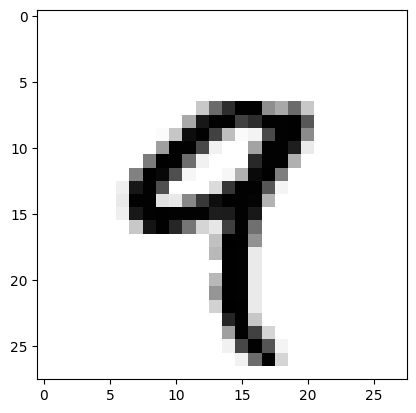

In [198]:
digit = train_images[4] # Select the fourth sample.
plt.imshow(digit, cmap=plt.cm.binary) # Show the sample.  cmap is the color map.  We will keep it black and white (binary)
plt.show()

The 4th train image looks like the number 9.  Lets make sure the label matches.

In [199]:
train_labels[4]

9

In [200]:
# Import models and layers from the keras library
from keras import models
from keras import layers

We will be working with sequential models and *dense layers*. More on what those mean later.  Another name for a dense layer is a *fully connected layer*.  The dense layer must be one-dimensional. Therefore, the input image matrix must be reshaped into a vector. There are 60,000 test images with a shape of 28 x 28. We will reshape each image into a vector of length 28 * 28 == 784.

We pick the `relu` activation function for our first layer and our output layer activation function is `softmax` because we have a multiclass classification problem.

In [201]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Now we compile the model.  We use the `adam` optimizer and choose `categorical_crossentropy` for the loss function because it is a multiclass classification problem. We will evaluate our model accuracy.

In [202]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 512)               401920    
                                                                 
 dense_89 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now the model is built and compiled we need to process the images for the model.  The images need to be reshaped into a vector of the same dimentions as the input shape above.  We also normalize the values of the images to be between 0 and 1.

In [203]:
scale_factor = train_images.max()
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/scale_factor

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/scale_factor

print(train_images.ndim)

2


In [204]:
print('train image shape:', train_images.shape)
print('number of dimensions:', train_images.ndim)
print('maximum value', train_images.max())
print('minimum value:', train_images.min())

train image shape: (60000, 784)
number of dimensions: 2
maximum value 1.0
minimum value: 0.0


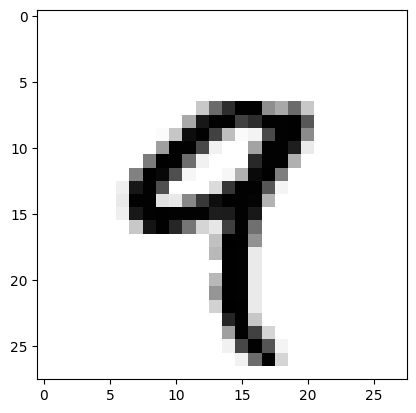

In [205]:
# We can always get our images back by reshaping to a matrix.
plt.imshow(train_images.reshape((60000,28,28))[4], cmap=plt.cm.binary)

In [206]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [207]:
# We need to convert the labels into catergorical values.
# We can check the train lables for the 4th value to ensure
# it is labeled as 9
print(train_labels[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [208]:
# Batch size is how many images to process at once.
# Epoch is how many times to repeat the analysis.
# Each epoch performs 500 gradient updates (60,000/120 = 500)
model.fit(train_images, train_labels, epochs = 5, batch_size = 120)

Epoch 1/5


500/500 [==============================] - 4s 7ms/step - loss: 0.3694 - accuracy: 0.8933
Epoch 2/5
500/500 [==============================] - 4s 7ms/step - loss: 0.3111 - accuracy: 0.9136
Epoch 3/5
500/500 [==============================] - 4s 7ms/step - loss: 0.3152 - accuracy: 0.9122
Epoch 4/5
500/500 [==============================] - 4s 7ms/step - loss: 0.3268 - accuracy: 0.9117
Epoch 5/5
500/500 [==============================] - 4s 7ms/step - loss: 0.3488 - accuracy: 0.9084


In [209]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3415 - accuracy: 0.9110
test_acc: 0.9110000133514404


####  Build 3 different models with a dense layer with `relu` activation.  The output layer activation must be `softmax` since we have a multiclass problem.  You will compile the three different models with different optimizers.

In [210]:
tf.random.set_seed(42)
model_opt = {}
for optimizer in ['adam', 'sgd', 'rmsprop']:
  model_opt[optimizer] = models.Sequential()
  model_opt[optimizer].add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  model_opt[optimizer].add(layers.Dense(10, activation='softmax'))

#### Compile your three models with three different optimizers. Page 89 - 90 of the tetbook list some different optimizers.  You can also find more optimizers and documentation here: https://keras.io/api/optimizers/
#### Use `categorical_crossentropy` for loss since this problem is a multiclass classification problem. The metric will be `accuracy`.

| Optimizer | Characteristics | When to Use |
|-----------|-----------------|-------------|
| **SGD** | - Simple and transparent.<br>- May require more epochs to converge.<br>- Optional momentum accelerates convergence. | - When you have a lot of data and simplicity is preferred.<br>- When finer control over the learning process is needed. |
| **Momentum** | - Helps accelerate SGD in the relevant direction.<br>- Can navigate ravines and small local minima better than plain SGD. | - When you want to resolve SGD’s slow convergence in saddle point regions.<br>- In deep networks that suffer from training plateaus. |
| **Nesterov Accelerated Gradient (NAG)** | - A variant of momentum.<br>- Looks ahead by calculating the gradient of the future position. | - When you need faster convergence than standard momentum.<br>- In convex or non-convex optimizations. |
| **Adagrad** | - Adapts the learning rate to the parameters.<br>- Performs larger updates for infrequent parameters. | - For sparse data (e.g., text data, images with lots of pixels not containing information).<br>- When dealing with non-stationary objectives. |
| **Adadelta** | - Addresses Adagrad’s rapidly decreasing learning rates.<br>- Uses a window of accumulated past gradients. | - When you need robustness to large gradients, noise, and architecture choice.<br>- In problems where learning rate should not diminish to infinitesimal values. |
| **RMSprop** | - Modifies Adagrad to prevent monotonically decreasing learning rate.<br>- Uses moving average of squared gradients. | - When training recurrent neural networks.<br>- For non-stationary objectives and noisy gradients. |
| **Adam** | - Combines benefits of Adagrad and RMSprop.<br>- Uses biased estimates of first and second moments of gradients. | - As a default optimizer, since it's suitable for a wide range of problems.<br>- When you desire an optimizer that requires minimal hyperparameter tuning. |
| **Adamax** | - A variant of Adam based on the infinity norm.<br>- More robust to large gradients. | - When gradients are very sparse or problems where Adam's learning rate becomes too small. |
| **Nadam** | - Combines NAG and Adam.<br>- Incorporates Nesterov momentum into Adam. | - When you want to leverage the benefits of Nesterov momentum with Adam's adaptive learning rates. |


In [211]:
for optimizer in model_opt:
  model_opt[optimizer].compile(optimizer=optimizer,
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [212]:
for optimizer in model_opt:
  print(f'Fitting model {optimizer}...')
  model_opt[optimizer].fit(train_images, train_labels, epochs=5, batch_size=150)



Fitting model adam...
Epoch 1/5
400/400 [==============================] - 3s 7ms/step - loss: 0.3764 - accuracy: 0.8919
Epoch 2/5
400/400 [==============================] - 3s 7ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
400/400 [==============================] - 3s 7ms/step - loss: 0.3050 - accuracy: 0.9142
Epoch 4/5
400/400 [==============================] - 3s 7ms/step - loss: 0.3104 - accuracy: 0.9143
Epoch 5/5
400/400 [==============================] - 3s 7ms/step - loss: 0.3291 - accuracy: 0.9113
Fitting model sgd...
Epoch 1/5
400/400 [==============================] - 3s 7ms/step - loss: 1.0453 - accuracy: 0.7535
Epoch 2/5
400/400 [==============================] - 3s 7ms/step - loss: 0.5458 - accuracy: 0.8642
Epoch 3/5
400/400 [==============================] - 3s 7ms/step - loss: 0.4521 - accuracy: 0.8810
Epoch 4/5
400/400 [==============================] - 3s 7ms/step - loss: 0.4092 - accuracy: 0.8893
Epoch 5/5
400/400 [==============================] - 3s 7ms/step -

#### Test the accuracy of the model on the test images and test labels.

In [213]:
best_opt = ''
best_acc = 0

for opt in model_opt:
  model = model_opt[opt]
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print(f'{model} test accuracy: {test_acc}')
  if test_acc > best_acc:
    best_acc = test_acc
    best_opt = opt

313/313 [==============================] - 2s 7ms/step - loss: 0.3316 - accuracy: 0.9082
<keras.src.engine.sequential.Sequential object at 0x44684f040> test accuracy: 0.9082000255584717
313/313 [==============================] - 2s 7ms/step - loss: 0.3531 - accuracy: 0.9031
<keras.src.engine.sequential.Sequential object at 0x446888a60> test accuracy: 0.9031000137329102
313/313 [==============================] - 2s 7ms/step - loss: 0.3260 - accuracy: 0.9156
<keras.src.engine.sequential.Sequential object at 0x44a49c610> test accuracy: 0.9156000018119812


# Which optimizer gave the highest accuracy? Write you answer below



In [214]:
print(f'Best optimizer: {best_opt}')
print(f'Best accuracy: {best_acc}')

Best optimizer: rmsprop
Best accuracy: 0.9156000018119812


### Using the optimizer that gave the highest accuracy compile 3 different models with 3 hidden layers and varying units in each hidden layer.  The first  layer is given to you.

In [221]:
model_params = {
    'h0_model': [512, 10],
    'h1_model': [768, 280, 28, 10],
    'h2_model': [512, 280, 28, 10],
    'h3_model': [384, 280, 28, 10],
}

model_selection = {}

def create_model(layer_sizes, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.Dense(layer_sizes[0], activation='relu', input_shape=input_shape))
    for size in layer_sizes[1:-1]:
        model.add(layers.Dense(size, activation='relu'))
    model.add(layers.Dense(layer_sizes[-1], activation='softmax'))
    return model

for model_name in model_params:
  print(model_name)
  model = create_model(model_params[model_name])
  model_selection[model_name] = model
  # print(model.summary())


h0_model
h1_model
h2_model
h3_model


#### Complie the three models with the best optimizer from above.

In [228]:
# optimizer = best_opt
loss = 'categorical_crossentropy'
metric = ['accuracy']

for model_name in model_selection:
  model = model_selection[model_name]
  optimizer = tf.keras.optimizers.RMSprop(0.000125)
  model.compile(optimizer=optimizer, loss=loss, metrics=metric)


#### Fit the models with epochs = 5 and  batch_size = 120

In [229]:
model_history = {}
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
for model_name in model_selection:
  model = model_selection[model_name]
  print(f'Fitting model {model_name}...')
  history = model.fit(train_images, train_labels, epochs=5, batch_size=120, verbose=0)
  model_history[model_name] = history
  

Fitting model h0_model...
Fitting model h1_model...
Fitting model h2_model...
Fitting model h3_model...


In [1]:
def plot_history(history):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title('Epochs vs Loss and Accuracy')
    
    ax.plot(history.history['loss'], label='Loss', color='r')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    
    ax2 = ax.twinx()
    ax2.plot(history.history['accuracy'], label='Accuracy')
    ax2.legend()
    ax2.set_ylabel('Accuracy')

    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    fig.tight_layout()
    plt.show()

#for model_name in model_history:
#    plot_history(model_history[model_name])

#### Test the accuracy of the 3 models

In [218]:
best_acc = 0
best_model = ''

for model_name in model_selection:
  model = model_selection[model_name]
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print(f'{model_name} test accuracy: {test_acc}')

  if test_acc > best_acc:
    best_acc = test_acc
    best_model = model_name


313/313 [==============================] - 3s 8ms/step - loss: 0.4239 - accuracy: 0.8954
h0_model test accuracy: 0.8953999876976013
313/313 [==============================] - 3s 8ms/step - loss: 2302.4243 - accuracy: 0.2990
h1_model test accuracy: 0.29899999499320984
313/313 [==============================] - 3s 8ms/step - loss: 3403.2383 - accuracy: 0.4319
h2_model test accuracy: 0.4318999946117401
313/313 [==============================] - 3s 8ms/step - loss: 973.7521 - accuracy: 0.4668
h3_model test accuracy: 0.4668000042438507


In [219]:
best_model

'h0_model'

#### Which model gave the highest accuracy? Write you answer below.

In [220]:
print(f'The model with the highest accuracy is {best_model} with an accuracy of {best_acc}')


The model with the highest accuracy is h0_model with an accuracy of 0.8953999876976013
